In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
import seaborn as sb

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
totalData = pd.read_csv('totalData.csv')
totalData.drop(['Unnamed: 0'], inplace=True, axis=1)
totalData.head()

,title,class
0,donald trump sends out embarrassing new years ...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke becomes an internet joke ...,0
3,trump is so obsessed he even has obamas name c...,0
4,pope francis just called out donald trump duri...,0


In [4]:
# import preprocess_kgptalkie as ps
# totalData['title'] = totalData['title'].apply(lambda x: ps.remove_special_chars(x))
totalData = totalData[totalData['title'].notnull()]
# totalData.head()
y = totalData['class'].values
x = [d.split() for d in totalData['title'].tolist()]

# print(x.)
# print(y)

In [5]:
## converting the words to vectors
wordToVec = gensim.models.Word2Vec(sentences=x, size=100, window=10, min_count=1)
len(wordToVec.wv.vocab)

26133

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)

(array([1.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.600e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.900e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 8.400e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.810e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

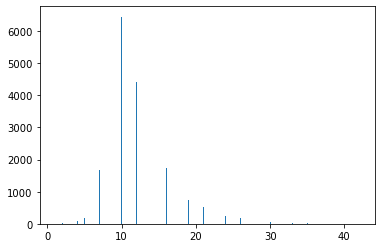

In [7]:
plt.hist([len(y) for y in x], bins=700)

In [8]:
array = np.array([len(y) for y in x])
maximumLength = 1000
x = pad_sequences(x, maxlen=maximumLength)

In [9]:
sizeOfVocab = len(tokenizer.word_index) + 1
totalVocab = tokenizer.word_index


In [10]:
def calculateMatrixWeight(model):
    matrixWeight = np.zeros((sizeOfVocab, 100))
    for word, index in totalVocab.items():
        matrixWeight[index]=model.wv[word]
    return matrixWeight

In [11]:
vectorsToEmbed = calculateMatrixWeight(wordToVec)
vectorsToEmbed.shape

(26134, 100)

In [12]:
totalModel = Sequential()
totalModel.add(Embedding(sizeOfVocab, output_dim=100, weights=[vectorsToEmbed], input_length=maximumLength, trainable=False))
totalModel.add(LSTM(units=128))
totalModel.add(Dense(1, activation='sigmoid'))
totalModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

2022-03-30 14:47:55.890731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-30 14:47:55.891422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
totalModel.fit(x_train,y_train, validation_split=0.3, epochs=6)
# print(y.shape)
# print(x.shape)

Epoch 1/6


2022-03-30 14:47:56.226263: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-30 14:47:56.635438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 14:47:56.777824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 14:48:00.120173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


737/737 [==============================] - ETA: 0s - loss: 0.2785 - acc: 0.8853

2022-03-30 14:51:24.541683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 14:51:24.597551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


737/737 [==============================] - 247s 321ms/step - loss: 0.2785 - acc: 0.8853 - val_loss: 0.2421 - val_acc: 0.9013
Epoch 2/6
737/737 [==============================] - 221s 299ms/step - loss: 0.2281 - acc: 0.9052 - val_loss: 0.2250 - val_acc: 0.9059
Epoch 3/6
737/737 [==============================] - 220s 298ms/step - loss: 0.2138 - acc: 0.9131 - val_loss: 0.2088 - val_acc: 0.9144
Epoch 4/6
737/737 [==============================] - 221s 300ms/step - loss: 0.1994 - acc: 0.9194 - val_loss: 0.2034 - val_acc: 0.9197
Epoch 5/6
737/737 [==============================] - 223s 303ms/step - loss: 0.1876 - acc: 0.9237 - val_loss: 0.1977 - val_acc: 0.9201
Epoch 6/6
737/737 [==============================] - 228s 310ms/step - loss: 0.1802 - acc: 0.9273 - val_loss: 0.2022 - val_acc: 0.9194


In [15]:
y_pred_train = (totalModel.predict(x_train) >= 0.5).astype(int)
y_pred_test = (totalModel.predict(x_test) >= 0.5).astype(int)
print('The accuracy for test: {}'.format(accuracy_score(y_test, y_pred_test)))

2022-03-30 15:10:36.463765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-30 15:10:36.508372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


The accuracy for test: 0.9200748462977814


[Text(0.5, 51.0, 'Test Data')]

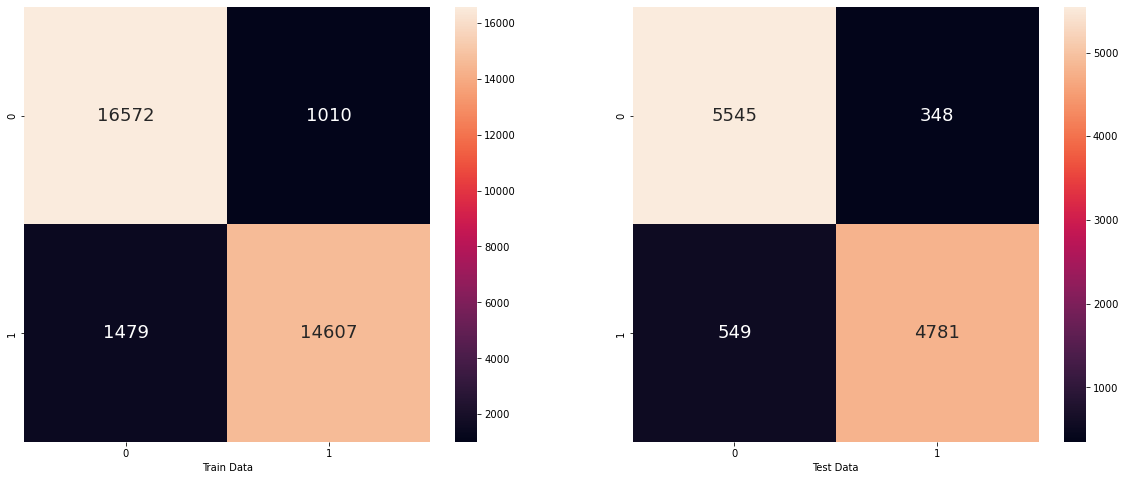

In [16]:
f, axes = plt.subplots(1, 2, figsize=(20, 8))

from sklearn.metrics import confusion_matrix
train = sb.heatmap(confusion_matrix(y_train, y_pred_train), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
train.set( xlabel = "Train Data")


test = sb.heatmap(confusion_matrix(y_test, y_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
test.set(xlabel="Test Data")

In [17]:
x = ['hello there how are you']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maximumLength)
(totalModel.predict(x)>=0.5).astype(int)

array([[0]])